<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/K_means_(crime_data)_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving crime_data.csv to crime_data.csv


In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [3]:
crime = pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [6]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([16.96661211]),
 array([14.59566832]),
 array([12.75151399]),
 array([11.71740197]),
 array([11.2026722]),
 array([10.6063271])]

([<matplotlib.axis.XTick at 0x7f7e8b078390>,
 <a list of 6 Text major ticklabel objects>)

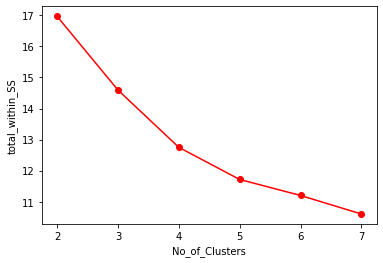

In [7]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [8]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,3
1,3
2,2
3,1
4,2
5,2
6,0
7,1
8,2
9,3


In [9]:
crime['h_clusterid'] = pd.DataFrame(Clusters)

In [10]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [15]:
#Grouping Data for predictions further 

result=crime.iloc[:,1:].groupby(crime.h_clusterid).mean()

In [16]:
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,4.955556,125.444444,80.111111,17.788889,0
1,6.975000,148.416667,62.333333,19.775000,1
2,11.054545,264.090909,79.090909,32.618182,2
3,14.087500,252.750000,53.500000,24.537500,3
4,2.680000,70.100000,51.000000,10.910000,4
